# This is Double DQN for Mountain Car 

In [9]:
import random
import numpy as np
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import gym
# from settings import PROJECT_ROOT

In [19]:
class DDQNA:
    def __init__(self, state_size, action_size):
        self.state = state_size
        self.action = action_size
        self.store_data = deque(maxlen=200000)
        print(self.store_data)
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.001
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.nn_model = self.neural_net()
        self.target_nn = self.neural_net()
        self.ed = []
        self.target_nn.set_weights(self.nn_model.get_weights())
        self.counter = 0

    def act(self, state):
        rand_var = np.random.rand()
        if rand_var <= self.epsilon:
            return random.randrange(self.action)
        action_v = self.nn_model.predict(state)
#         print("action_v",action_v)
        return np.argmax(action_v[0]) 
    
    def neural_net(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(128, input_dim = self.state, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(self.action, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
            
        return model

    def store(self, state, action, reward, next_state, done):
        self.store_data.append((state, action, reward, next_state, done))
#         print("Stored_data", self.store_data)
    
    def q_values(self, next_state, reward): 
    #         print(next_state)
        action1 = np.argmax(self.nn_model.predict(next_state)[0])
        q_update = self.target_nn.predict(next_state)[0][action1]
        q_update = self.gamma * q_update
        q_update = reward + q_update
#         self.counter += 1 
#         print(self.counter)
        return q_update
        
    def replay(self, batch_size):
        sample_data = random.sample(self.store_data, batch_size)
#         sample_data = sample(range(self.store_data), batch_size)
        if len(self.store_data) < batch_size: 
            return
        for state, action, reward, next_state, done in sample_data:
            if done:
                q_update = reward
            if not done:
                q_update = self.q_values(next_state, reward)
            q_val = self.nn_model.predict(state)
#             print("q_val",q_val)
            q_val[0][action] = q_update
#             print("q_update",q_update)
            self.nn_model.fit(state, q_val, batch_size = batch_size, epochs=1, verbose=0)
        self.counter += 1
        self.ed.append(self.epsilon)
        self.epsilon *= self.epsilon_decay
        self.epsilon = max(self.epsilon_min, self.epsilon)
        if self.counter == 10:
            self.target_nn.set_weights(self.nn_model.get_weights())
            print("updating")
            self.counter = 0

2
3
deque([], maxlen=200000)
Mean -200.0
Ep 1/4000# Score:-200.0
Mean -200.0
Ep 2/4000# Score:-200.0
Mean -200.0
Ep 3/4000# Score:-200.0
Mean -200.0
Ep 4/4000# Score:-200.0
Mean -200.0
Ep 5/4000# Score:-200.0
Mean -200.0
Ep 6/4000# Score:-200.0
Mean -200.0
Ep 7/4000# Score:-200.0
Mean -200.0
Ep 8/4000# Score:-200.0
Mean -200.0
Ep 9/4000# Score:-200.0
updating
Mean -200.0
Ep 10/4000# Score:-200.0
Mean -200.0
Ep 11/4000# Score:-200.0
Mean -200.0
Ep 12/4000# Score:-200.0
Mean -200.0
Ep 13/4000# Score:-200.0
Mean -200.0
Ep 14/4000# Score:-200.0
Mean -200.0
Ep 15/4000# Score:-200.0
Mean -200.0
Ep 16/4000# Score:-200.0
Mean -200.0
Ep 17/4000# Score:-200.0
Mean -198.33333333333334
Ep 18/4000# Score:-170.0
Mean -198.42105263157896
Ep 19/4000# Score:-200.0
updating
Mean -198.5
Ep 20/4000# Score:-200.0
Mean -198.57142857142858
Ep 21/4000# Score:-200.0
Mean -198.63636363636363
Ep 22/4000# Score:-200.0
Mean -198.69565217391303
Ep 23/4000# Score:-200.0
Mean -198.75
Ep 24/4000# Score:-200.0
Mean -19

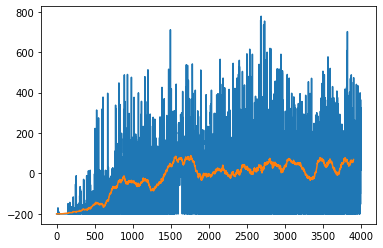

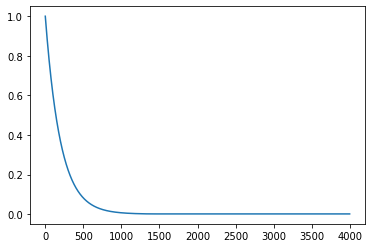

In [20]:
############################################# TRIAL ########################################################
Episods = 4000
Rec_score = -110
env = gym.make('MountainCar-v0')
obs_size = env.observation_space.shape[0]
print(obs_size)
action_size = env.action_space.n
print(action_size)
hill = DDQNA(obs_size, action_size)
batch_size = 128
score = 0
com_score = []
ep = []
tmp = deque(maxlen = 100)
for epi in range(1, Episods): 
    state = env.reset()
    score = 0
#     print(state)
    state = np.reshape(state, [1, obs_size])
#     print(state)
    for i in range(200):
#         env.render()
        action = hill.act(state)
        next_state, reward,done,info = env.step(action)
        next_state = np.reshape(next_state, [1,obs_size])
#         print("hi")
#         if not done: 
#             reward = reward
#         if done:
#             reward = -reward
#         print("Next_state",next_state)
#         print("Next_state", next_state[0][0])
#         if (next_state[0][0] > Rec_score):
#             Rec_score = next_state[0][0]
#         if next_state[0][0] >= -0.20:
#             reward += 3        
        if next_state[0][0] >= -0.25:
            reward += 3
#             print("hi")
        if next_state[0][0] >= 0.20:
            reward += 10
            print("I want to go higher")
#         if next_state[0][0] >= 0.3:
#             reward += 10
#         if next_state[0][0] >= 0.4 and  next_state[0][0] < 0.5:
#             reward += 7
#             print("All most there, can do better")
        if next_state[0][0] >= 0.5:
            reward += 15
            print("Holy shit I never knew I would be rewarded this much, Thank you! (*Cries in happiness)")
        score = score + reward
#         if score >= 0: 
#             score = 0
        hill.store(state,action,reward,next_state, done)
        state = next_state
#         print(reward)
#         score = score + reward
        if done == True:  
            break
#     time.sleep(1)
#     env.close()
    com_score.append(score)
    tmp.append(score)
    if epi > 99: 
        ep.append(np.mean(tmp))
    hill.replay(batch_size)
    print("Mean", np.mean(tmp))
    if (np.mean(tmp) > Rec_score): 
        print("solved at episode: ", epi," with avg: ", np.mean(tmp))
    print("Ep {}/{}# Score:{}".format(epi, Episods, score))
#     epi += 1 
fig = plt.figure(1)
plt.clf()
plt.plot(com_score)
plt.plot(ep)
plt.show()
fig = plt.figure(2)
plt.plot(hill.ed)
plt.plot(hill.learning_rate)
